# Ejercicio 1 | CVRPTW   | Cadena de Suministros

#### **Variables de decisión** ####

- $x_{i,j}$ igual a 1 cuando se decide viajar en el arco $(i,j) \in A$; cero de lo contrario

- $u_i$ capacidad $;i \; \in\; C$

#### **Función Objetivo**####
$Min\; z= \; \displaystyle\sum_{i\;\in\;A}^{} \sum_{j\;\in\;A}^{} x_{ij}c_{ij}$

#### **Restricciones**####
$\displaystyle\sum_{i\;\in\;Cliente}^{}x_{ij}=1$   $\; \; \forall \;j \; \in \; Nodos$

$\displaystyle\sum_{j\;\in\;Cliente}^{}x_{ij}=1$   $\; \; \forall \;i \; \in \; Nodos$

$Si \; x_{ij}=1 \Rightarrow u{i}+q_{j}=u{j}$
$\; \; i,j\in Arcos: i \neq0,j\neq0 $

$ q_i\leq u_i \leq Q \; \; i \in Nodos$

### **Formulación matemática del problema**
-cliente (C): Conjunto de **clientes**

-nodos (N) : Conjunto de **nodos**, donde 0 representa del DC |$\;N= \{0\} \cup C $

-arcos (A): Conjunto de todos los **arcos** entre cada nodo |$\;A= \{(i,j) \ in N^2 : i \neq j\}$

-$c_{ij}$ = Costo o distancia entre nodos i y el nodo j

-$q_i$ = carga de cada paquete en Cliente.

-Q: Capacidad de los vehículos.

In [1]:
from gurobipy import Model, GRB, quicksum
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
Q=200
V=25
df=pd.read_csv("data.csv")
df.set_index('CUST NO.',inplace=True)
nodos=[a for a in df.index]
clientes=[a for a in nodos if a!=0]
vehiculos=[i for i in range(1,V+1)]
df

,XCOORD.,YCOORD.,DEMAND,READY TIME,DUE DATE,SERVICE TIME
CUST NO.,,,,,,
0,40,50,0,0,1236,0
1,45,68,10,0,1127,90
2,45,70,30,0,1125,90
3,42,66,10,0,1129,90
4,42,68,10,727,782,90
5,42,65,10,0,1130,90
6,40,69,20,621,702,90
7,40,66,20,0,1130,90
8,38,68,20,255,324,90


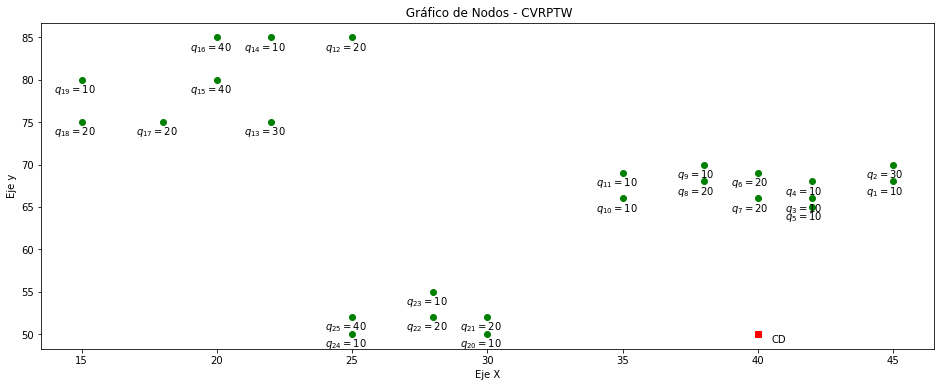

In [3]:
plt.figure(figsize=(16,6)) #tamaño del lienzo donde se grafica
plt.scatter(df['XCOORD.'],df['YCOORD.'],c='green') #graficar coordenadas de clientes

for i in clientes:
     plt.annotate('$q_{%d}=%d$'%(i,df['DEMAND'][i]),(df['XCOORD.'][i]-1,df['YCOORD.'][i]-1.5)) #lo que acompaña al "q" es la demanda de cada cliente

#graficar CD
plt.plot(df['XCOORD.'][0],df['YCOORD.'][0],color="red",marker='s') #marker (cuadrado)
plt.annotate('CD',(df['XCOORD.'][0]+0.5,df['YCOORD.'][0]-1))

#Formato al gráfico
plt.xlabel("Eje X")
plt.ylabel("Eje y")
plt.title(" Gráfico de Nodos - CVRPTW")
plt.show()

In [4]:
arcos = {(i, j) for i in nodos for j in nodos if i != j} #lista con caminos

In [5]:
arcosVehiculos = {(i, j, k) for i in nodos for j in nodos for k in vehiculos if i != j} #lista con caminos
vehiculosNodos={(k, i) for i in nodos for k in vehiculos} #lista con caminos
distancia = {(i, j): round(np.hypot(df['XCOORD.'][i]-df['XCOORD.'][j], df['YCOORD.'][i]-df['YCOORD.'][j]),1) for i,j in arcos} # Matriz de distancias
tiempo = {(i, j): distancia[i,j]+ df['SERVICE TIME'][j] for i,j in arcos}
LB={(k,i):df['READY TIME'][k] for i in nodos for k in vehiculos }
UB={(k,i):df['DUE DATE'][k] for i in nodos for k in vehiculos }

## Creación y Optimización - CVRPTW ##

In [6]:
m=Model('CVRPTW')

Academic license - for non-commercial use only - expires 2021-06-20
Using license file C:\Users\jplop\gurobi.lic


#### **Variables de decisión** ####

- $x_{i,j}$ igual a 1 cuando se decide viajar en el arco $(i,j) \in A$; cero de lo contrario

- $u_i$ capacidad $;i \; \in\; C$

In [7]:
x=m.addVars(arcosVehiculos,vtype=GRB.BINARY)
t=m.addVars(vehiculosNodos,vtype=GRB.CONTINUOUS)

#### **Función Objetivo** ####
$Min\; z= \; \displaystyle\sum_{i\;\in\;A}^{} \sum_{j\;\in\;A}^{} x_{ij}c_{ij}$

In [8]:
obj=quicksum(distancia[i,j]*x[i,j,k] for i, j, k in arcosVehiculos)
m.setObjective(obj,GRB.MINIMIZE)

#### **Restricciones** 
$\displaystyle\sum_{i\;\in\;Cliente}^{}x_{ij}=1$   $\; \; \forall \;j \; \in \; Nodos$

$\displaystyle\sum_{j\;\in\;Cliente}^{}x_{ij}=1$   $\; \; \forall \;i \; \in \; Nodos$

$Si \; x_{ij}=1 \Rightarrow u{i}+q_{j}=u{j}$
$\; \; i,j\in Arcos: i \neq0,j\neq0 $

$ q_i\leq u_i \leq Q \; \; i \in Nodos$

In [9]:
#Un vehiculo por nodo
m.addConstrs(quicksum(x[i, j, k] for j in nodos for k in vehiculos if j != i) == 1 for i in clientes)
m.addConstrs(quicksum(x[i, j, k] for i in nodos for k in vehiculos if j != i) == 1 for j in clientes)

{1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>,
 10: <gurobi.Constr *Awaiting Model Update*>,
 11: <gurobi.Constr *Awaiting Model Update*>,
 12: <gurobi.Constr *Awaiting Model Update*>,
 13: <gurobi.Constr *Awaiting Model Update*>,
 14: <gurobi.Constr *Awaiting Model Update*>,
 15: <gurobi.Constr *Awaiting Model Update*>,
 16: <gurobi.Constr *Awaiting Model Update*>,
 17: <gurobi.Constr *Awaiting Model Update*>,
 18: <gurobi.Constr *Awaiting Model Update*>,
 19: <gurobi.Constr *Awaiting Model Update*>,
 20: <gurobi.Constr *Awaiting Model Update*>,
 21: <gurobi.Constr *Awaiting Model Update*>,
 22: <gurobi.Constr *Awaiting Model Update*

In [10]:
#Salir y llegar al CD
m.addConstrs(quicksum(x[0, j, k] for j in clientes if j!= 0) <= 1 for k in vehiculos)
m.addConstrs(quicksum(x[i, 0, k] for i in clientes  if i!= 0) <= 1 for k in vehiculos)

{1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>,
 10: <gurobi.Constr *Awaiting Model Update*>,
 11: <gurobi.Constr *Awaiting Model Update*>,
 12: <gurobi.Constr *Awaiting Model Update*>,
 13: <gurobi.Constr *Awaiting Model Update*>,
 14: <gurobi.Constr *Awaiting Model Update*>,
 15: <gurobi.Constr *Awaiting Model Update*>,
 16: <gurobi.Constr *Awaiting Model Update*>,
 17: <gurobi.Constr *Awaiting Model Update*>,
 18: <gurobi.Constr *Awaiting Model Update*>,
 19: <gurobi.Constr *Awaiting Model Update*>,
 20: <gurobi.Constr *Awaiting Model Update*>,
 21: <gurobi.Constr *Awaiting Model Update*>,
 22: <gurobi.Constr *Awaiting Model Update*

In [11]:
m.addConstrs(t[k,i]<=df['DUE DATE'][i] for i in clientes for k in vehiculos)
m.addConstrs(t[k,i]>=df['READY TIME'][i] for i in clientes for k in vehiculos)

{(1, 1): <gurobi.Constr *Awaiting Model Update*>,
 (1, 2): <gurobi.Constr *Awaiting Model Update*>,
 (1, 3): <gurobi.Constr *Awaiting Model Update*>,
 (1, 4): <gurobi.Constr *Awaiting Model Update*>,
 (1, 5): <gurobi.Constr *Awaiting Model Update*>,
 (1, 6): <gurobi.Constr *Awaiting Model Update*>,
 (1, 7): <gurobi.Constr *Awaiting Model Update*>,
 (1, 8): <gurobi.Constr *Awaiting Model Update*>,
 (1, 9): <gurobi.Constr *Awaiting Model Update*>,
 (1, 10): <gurobi.Constr *Awaiting Model Update*>,
 (1, 11): <gurobi.Constr *Awaiting Model Update*>,
 (1, 12): <gurobi.Constr *Awaiting Model Update*>,
 (1, 13): <gurobi.Constr *Awaiting Model Update*>,
 (1, 14): <gurobi.Constr *Awaiting Model Update*>,
 (1, 15): <gurobi.Constr *Awaiting Model Update*>,
 (1, 16): <gurobi.Constr *Awaiting Model Update*>,
 (1, 17): <gurobi.Constr *Awaiting Model Update*>,
 (1, 18): <gurobi.Constr *Awaiting Model Update*>,
 (1, 19): <gurobi.Constr *Awaiting Model Update*>,
 (1, 20): <gurobi.Constr *Awaiting Model

In [12]:
#Conservación del flujos
m.addConstrs(quicksum(x[h, j, k] for j in nodos if j != h)-quicksum(x[i, h, k] for i in nodos if i!= h) == 0 for h in clientes for k in vehiculos)

#Capacidad del vehiculo
m.addConstrs(quicksum(df['DEMAND'][i]*x[i, j, k] for i in clientes for j in nodos if j != i) <= Q for k in vehiculos)

#Ventanas de tiempo
m.addConstrs((t[k,i] + tiempo[i,j] - 2000*(1 - x[i,j,k]) <= t[k,j]) for i in clientes for j in clientes for k in vehiculos if i != j)

{(1, 2, 1): <gurobi.Constr *Awaiting Model Update*>,
 (1, 2, 2): <gurobi.Constr *Awaiting Model Update*>,
 (1, 2, 3): <gurobi.Constr *Awaiting Model Update*>,
 (1, 2, 4): <gurobi.Constr *Awaiting Model Update*>,
 (1, 2, 5): <gurobi.Constr *Awaiting Model Update*>,
 (1, 2, 6): <gurobi.Constr *Awaiting Model Update*>,
 (1, 2, 7): <gurobi.Constr *Awaiting Model Update*>,
 (1, 2, 8): <gurobi.Constr *Awaiting Model Update*>,
 (1, 2, 9): <gurobi.Constr *Awaiting Model Update*>,
 (1, 2, 10): <gurobi.Constr *Awaiting Model Update*>,
 (1, 2, 11): <gurobi.Constr *Awaiting Model Update*>,
 (1, 2, 12): <gurobi.Constr *Awaiting Model Update*>,
 (1, 2, 13): <gurobi.Constr *Awaiting Model Update*>,
 (1, 2, 14): <gurobi.Constr *Awaiting Model Update*>,
 (1, 2, 15): <gurobi.Constr *Awaiting Model Update*>,
 (1, 2, 16): <gurobi.Constr *Awaiting Model Update*>,
 (1, 2, 17): <gurobi.Constr *Awaiting Model Update*>,
 (1, 2, 18): <gurobi.Constr *Awaiting Model Update*>,
 (1, 2, 19): <gurobi.Constr *Awaiting

In [13]:
m.Params.TimeLimit = 120  #límite de tiempo (segundos)
m.optimize()

Changed value of parameter TimeLimit to 120.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 17000 rows, 16900 columns and 125625 nonzeros
Model fingerprint: 0x605b4150
Variable types: 650 continuous, 16250 integer (16250 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+03]
  Objective range  [1e+00, 4e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+03]
Found heuristic solution: objective 855.3000000
Presolve removed 4475 rows and 2075 columns
Presolve time: 0.19s
Presolved: 12525 rows, 14825 columns, 103025 nonzeros
Variable types: 600 continuous, 14225 integer (14225 binary)

Deterministic concurrent LP optimizer: primal and dual simplex
Showing first log only...

Concurrent spin time: 0.00s

Solved with dual simplex

Root relaxation: objective 1.245000e+02, 596 iterations, 0.10 seconds

    Nodes   

In [14]:
arcos_activos=[z for z in arcosVehiculos if x[z].x> 0.99] #con el .x se llama a la solución. En cplex es .solution_value 
arcos_activos

[(9, 6, 12),
 (0, 13, 5),
 (11, 9, 12),
 (12, 14, 5),
 (14, 16, 5),
 (13, 17, 5),
 (5, 0, 5),
 (6, 4, 12),
 (20, 24, 10),
 (7, 8, 12),
 (3, 0, 12),
 (2, 3, 12),
 (0, 7, 12),
 (18, 15, 5),
 (17, 18, 5),
 (21, 0, 10),
 (23, 22, 10),
 (0, 20, 10),
 (8, 10, 12),
 (24, 25, 10),
 (1, 2, 12),
 (25, 23, 10),
 (10, 11, 12),
 (22, 21, 10),
 (15, 12, 5),
 (19, 5, 5),
 (16, 19, 5),
 (4, 1, 12)]

In [15]:
m.objVal

205.60000000000002

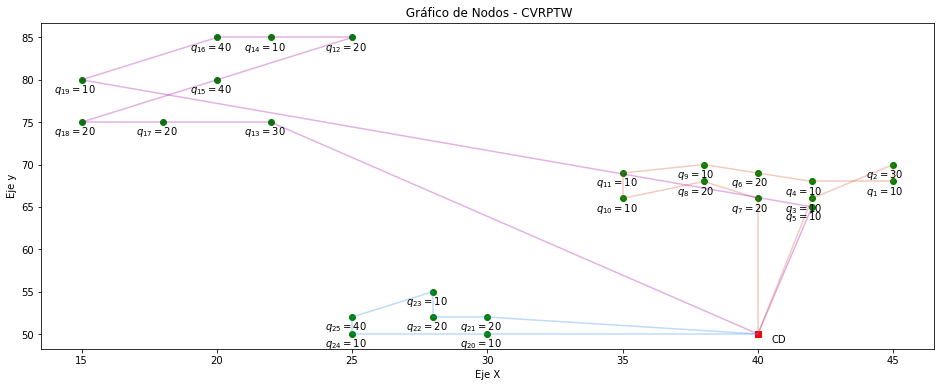

In [16]:
from Color import Color
plt.figure(figsize=(16,6)) #tamaño del lienzo donde se grafica
plt.scatter(df['XCOORD.'],df['YCOORD.'],c='green') #graficar coordenadas de clientes

for i in clientes:
     plt.annotate('$q_{%d}=%d$'%(i,df['DEMAND'][i]),(df['XCOORD.'][i]-1,df['YCOORD.'][i]-1.5)) #lo que acompaña al "q" es la demanda de cada cliente

#graficar CD
plt.plot(df['XCOORD.'][0],df['YCOORD.'][0],color="red",marker='s') #marker (cuadrado)
plt.annotate('CD',(df['XCOORD.'][0]+0.5,df['YCOORD.'][0]-1))

for i,j,k in arcos_activos:
     plt.plot([df['XCOORD.'][i],df['XCOORD.'][j]],[df['YCOORD.'][i],df['YCOORD.'][j]],c=Color(k),alpha=0.3)

#Formato al gráfico
plt.xlabel("Eje X")
plt.ylabel("Eje y")
plt.title(" Gráfico de Nodos - CVRPTW")
plt.show()


<function matplotlib.pyplot.show(*args, **kw)>

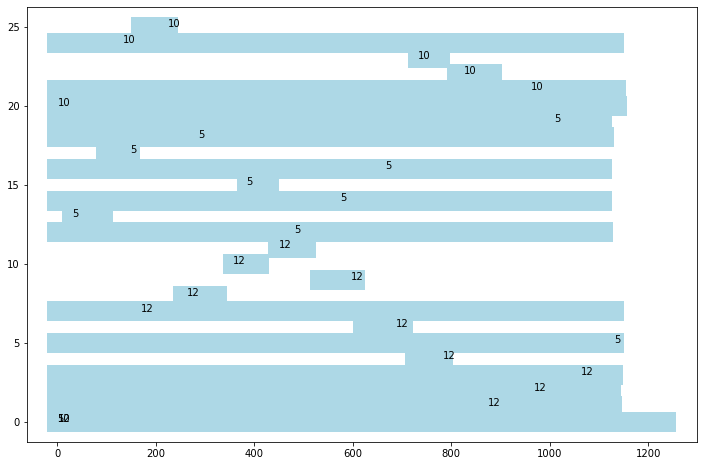

In [25]:
plt.figure(figsize=(12,8))
#plt.scatter(loc_x,loc_y,c='g')
for i in nodos:
    for j in nodos:
        if i != j:
            for k in vehiculos:
                if x[i,j,k].x>0.9:
                    plt.plot([df['READY TIME'][i],df['DUE DATE'][i]],[i,i],color='lightblue',alpha=1,linewidth=20)
                    #plt.plot([int(t[k,i].x),int(t[k,j].x)],[i,i],color='red',alpha=1,linewidth=10)
                    plt.annotate(k,(int(t[k,i].x),i))
                    #plt.annotate(j,(int(t[k,j].x),k))
                    #plt.annotate("Vehiculo "+str(k),((df['READY TIME'][j]+df['DUE DATE'][j])/2-20,j),)
                    #plt.annotate("Aircraft "+str(i),((df['READY TIME'][i]+df['DUE DATE'][i])/2-30,i-0.7))
#plt.ylim(-1,9)
#plt.savefig("Schedulling")
plt.show

In [47]:
for i in clientes:
    for k in vehiculos:
        if t[k,i].x>0 :
            if t[k,i].x<df['READY TIME'][i]:
                print(i,k)
                print(df['READY TIME'][i],t[i,k].x,df['DUE DATE'][i])
            elif t[k,i].x>df['DUE DATE'][i]:
                print(i,k)
                print(df['READY TIME'][i],t[i,k].x,df['DUE DATE'][i])